
# SVM - Support Vector Machines





Bu dersimizde Machine Learning modellerinden SVM - Support Vector Machines Modelini Python'da şeker hastalığı veri setini örneğiyle uygulamalı olarak öğreneceğiz.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("svm_dataset.csv") # diyabet dataseti ile çok benzer bir dataset ( değiiştirilmiş hali )
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


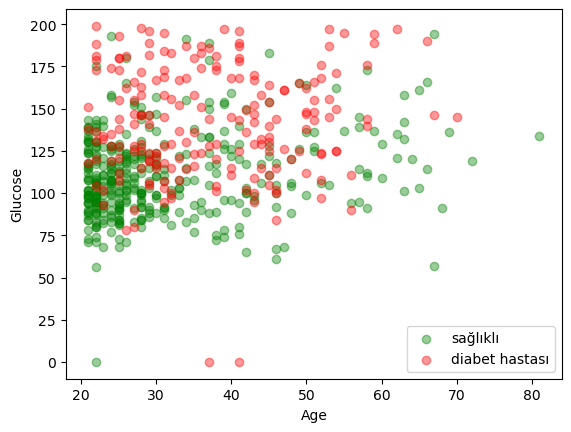

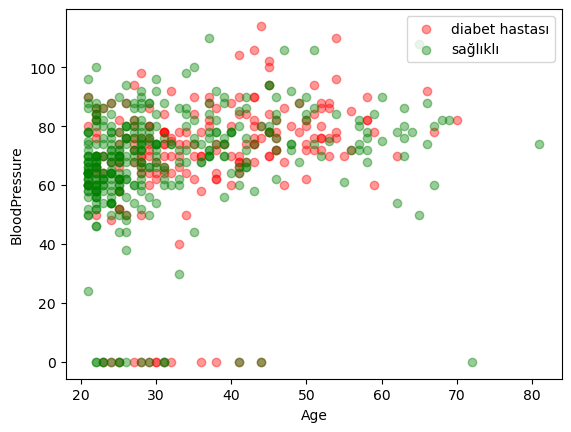

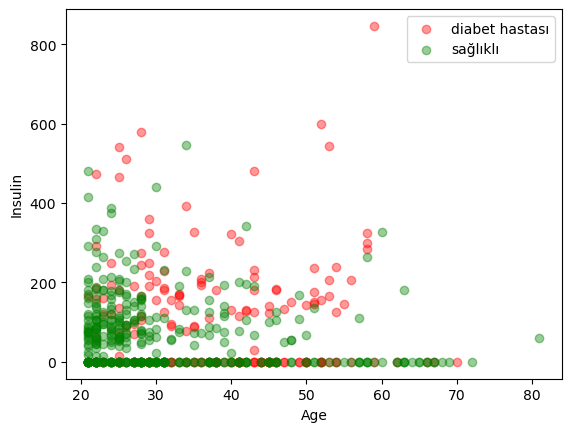

In [27]:


seker_hastalari = data[data.Outcome == 1] # outcome hastalık durumunu beirtiyor 1 ise hasta,0 ise sağlıklı anlamına geliyor
saglikli_insanlar = data[data.Outcome == 0]


#  gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="sağlıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha = 0.4)

plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


# kan basıncı-yaş
plt.scatter(seker_hastalari.Age, seker_hastalari.BloodPressure, color="red", label="diabet hastası", alpha = 0.4)
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.BloodPressure, color="green", label="sağlıklı", alpha = 0.4)

plt.xlabel("Age")
plt.ylabel("BloodPressure")
plt.legend()
plt.show()


# insülin-yaş
plt.scatter(seker_hastalari.Age, seker_hastalari.Insulin, color="red", label="diabet hastası", alpha = 0.4)
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Insulin, color="green", label="sağlıklı", alpha = 0.4)

plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()


In [28]:


# x ve y eksenlerini belirleyelim
y = data.Outcome.values
x_orjinal = data.drop(["Outcome"],axis=1)   
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü algoritmamız x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - x_orjinal içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve algoritmayı yanıltabilir!
x = (x_orjinal - np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_orjinal.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      193             50             16      375  25.9   
1           11      155             76             28      150  33.3   
2            3      191             68             15      130  30.9   
3            3      141              0              0        0  30.0   
4            4       95             70             32        0  32.1   

   DiabetesPedigreeFunction  Age  
0                     0.655   24  
1                     1.353   51  
2                     0.299   34  
3                     0.761   27  
4                     0.612   24  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.001182  0.228132       0.059102       0.018913  0.443262  0.030615   
1     0.013002  0.183215       0.089835       0.033097  0.177305  0.039362   
2     0.003546  

In [29]:

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...% 20 lik kısmını kullanacak
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=3)





In [30]:
# SVM modelimizi oluşturuyoruz.

In [31]:
svm_model = SVC(random_state = 3)
svm_model.fit(x_train,y_train)
 


SVC(random_state=3)

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


In [ ]:
# Verileri elimizede olan yeni istediğimiz kadar kişinin şeker hastası olma ihtimallerini SVM ile bulalım:

lst = [7, 128, 71, 34, 0, 35.6, 0.617, 50]
lst2 = [7, 128, 71, 34, 0, 35.6, 0.617, 40]
arr = np.array([lst, lst2])

In [34]:
# Normalizasyon işlemi uygulanmış verilere dönüştürme
arr_normalized = (arr - np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))



In [35]:

df = pd.DataFrame(arr_normalized)
df


,0,1,2,3,4,5,6,7
0,0.008274,0.1513,0.083924,0.040189,0.0,0.04208,0.000729,0.059102
1,0.008274,0.1513,0.083924,0.040189,0.0,0.04208,0.000729,0.047281


In [36]:
print(svm_model.predict(df))

[0 0]


c:\Users\canoz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Modelimizin başarı yüzdesini hesaplayalım

In [37]:
print("svm accuracy: %",(svm_model.score(x_test,y_test)) * 100)

svm accuracy: % 73.68421052631578
